In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('BlackFriday.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
del df['Product_Category_2']
del df['Product_Category_3']

df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [6]:
df.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

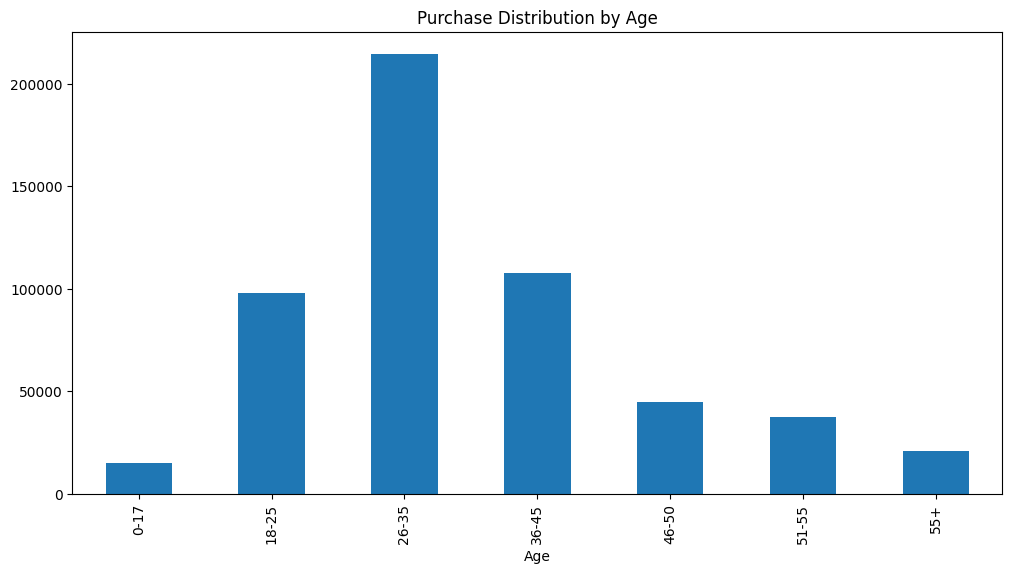

In [7]:
df.groupby('Age').size().plot(kind='bar', title='Purchase Distribution by Age', figsize=(12,6))

In [8]:
# number of different products in all the age ranges
lst = []
for i in df['Age'].unique():
    lst.append([i,df[df['Age'] == i]['Product_ID'].nunique()])

lst

[['0-17', 2300],
 ['55+', 2573],
 ['26-35', 3419],
 ['46-50', 3099],
 ['51-55', 2877],
 ['36-45', 3318],
 ['18-25', 3213]]

<Axes: xlabel='Age'>

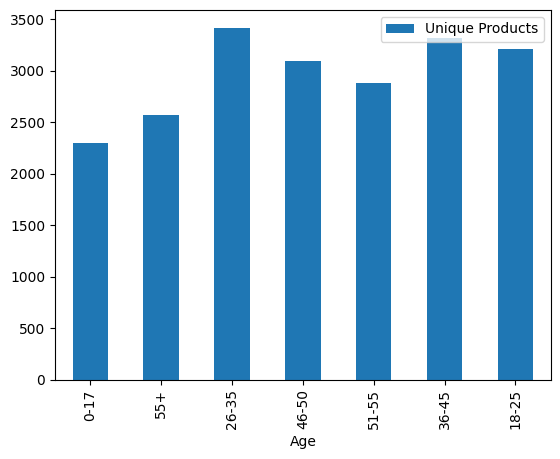

In [9]:
data = pd.DataFrame(lst, columns=['Age', 'Unique Products'])
data.plot.bar(x = 'Age')

<Axes: title={'center': 'Amount spend by age'}, xlabel='Age'>

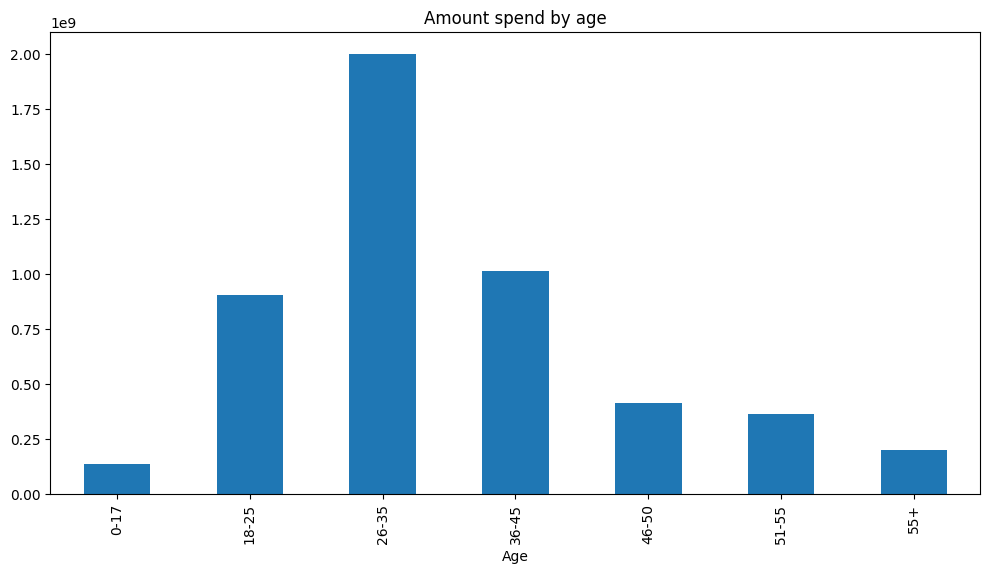

In [10]:
df.groupby('Age')['Purchase'].sum().plot(kind='bar',figsize=(12,6),title='Amount spend by age')

<Axes: ylabel='Purchase'>

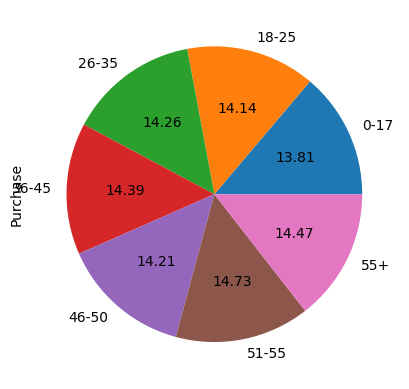

In [11]:
df.groupby('Age')['Purchase'].mean().plot(kind='pie',autopct = "%0.2f")

<Axes: >

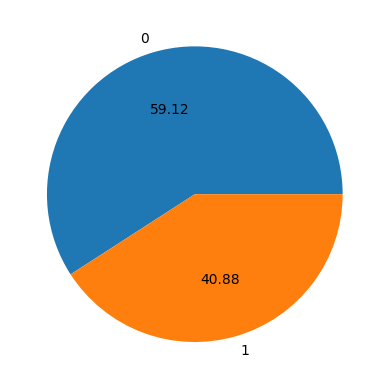

In [12]:
df.groupby('Marital_Status').size().plot(kind='pie',autopct = "%0.2f")

<Axes: ylabel='Marital_Status'>

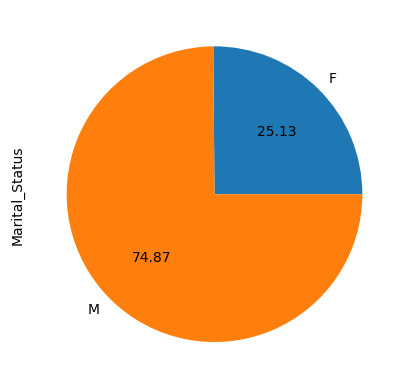

In [13]:
df.groupby('Gender')['Marital_Status'].sum().plot(kind='pie', autopct = "%0.2f")